This first attempt is the implementation of deep Q learning to control 1 misconfiguration inverter. <br/>
Feeder: feeder13_U_R_Pecan_Solar, has one inverter.


In [2]:

from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import numpy as np

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']

DSSText.command = 'Compile C:/feeders/feeder13_U_R_Pecan_Solar/feeder13_U_R_Pecan_Solar.dss'
# This is a quick way to change properties of a specific group of device, here the regulator and cap controls are enabled
setRegInfo(DSSObj,list(DSSCircuit.RegControls.AllNames),'enabled',[1]* len(DSSCircuit.RegControls.AllNames))
setCapControlInfo(DSSObj,list(DSSCircuit.CapControls.AllNames),'enabled',[1]*len(DSSCircuit.CapControls.AllNames))


DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1440 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation
DSSSolution.Solve()

Monitor Name: meter_632_power


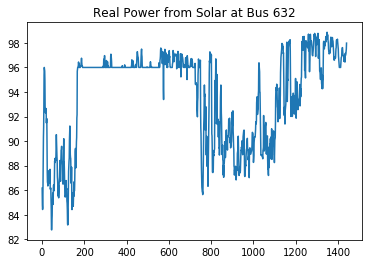

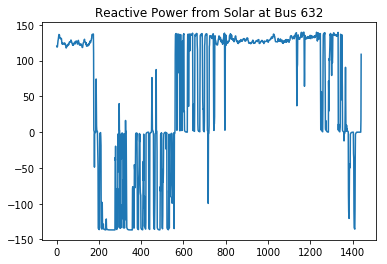

{'name': 'vv_curve_deadband', 'npts': 6, 'xarray': array([0.5 , 0.98, 0.99, 1.01, 1.02, 1.5 ]), 'yarray': array([ 1.,  1.,  0.,  0., -1., -1.])}


In [9]:
DSSMon=DSSCircuit.Monitors
DSSMon.Name='Meter_632_power'
print('Monitor Name: ' + DSSMon.Name )

#print(DSSMon.dblHour)
time=3600*np.asarray((DSSMon.dblHour))
Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

# Generation is negative in OpenDSS hence, multiply by -1
plt.figure()
plt.plot(time,-Real_power)
plt.title('Real Power from Solar at Bus 632')
plt.show()

plt.figure()
plt.plot(time,-Reactive_power)
plt.title('Reactive Power from Solar at Bus 632')
plt.show()

#DSSMon=DSSCircuit.Monitors
#DSSMon.Name='Meter_692_power'

#Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
#Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

#plt.figure()
#plt.plot(time,-Real_power)
#plt.title('Real Power from Solar at Bus 692')
#plt.show()

#plt.figure()
#plt.plot(time,-Reactive_power)
#plt.title('Reactive Power from Solar at Bus 692')
#plt.show()


# Getting a specific xycurve
xycurves=getXYCurveInfo(DSSObj,['vv_curve_deadband'])
# because it returns a list
vw_curve=xycurves[0]
# print to console
print(vw_curve)
# Change one parameter of the curve
#vw_curve['xarray']=np.asarray([1,1,1,1])
# making sure that the change happened
#print(vw_curve)
# set the curveinformation
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

# make sure that the change happened
#xycurves=getXYCurveInfo(DSSObj,['vw_curve'])
#vw_curve=xycurves[0]
#print(vw_curve)

# Error Checking, this will generate an error as npts do not match the length of the xarray
#vw_curve['xarray']=np.asarray([1,1,1,1,1])
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

(' V1', ' VAngle1', ' V2', ' VAngle2', ' V3', ' VAngle3', ' I1', ' IAngle1', ' I2', ' IAngle2', ' I3', ' IAngle3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


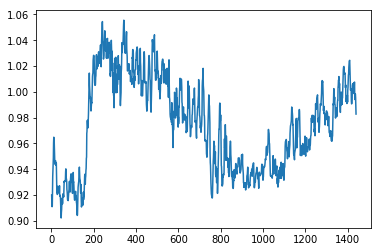

In [10]:
DSSMon.Name='Meter_632_voltage'
# just printing the meter headers
print(DSSMon.header)
# Unfortunately the channel does not have the time information (still under investigation)
time=3600*np.asarray(list(DSSMon.dblHour)) # Multiplying by 3600 converts it to seconds
# Reading the Voltage
Voltage_Phasea=np.asarray(DSSMon.Channel(1))
Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
Voltage_Phasec=np.asarray(DSSMon.Channel(5))
Voltage=Voltage_Phasea +Voltage_Phaseb+Voltage_Phasec
# dividing by the base and also taking average
plt.plot(time,Voltage/(3*2400))
plt.show()

###########################################################################################
###########################################################################################
###########################################################################################

In [11]:
# This code runs the 13 Node Balanced Model using the Python OpenDSS interface
# The code also runs the custom FBS functions to compare the results
# Please make sure you have the necessary libraries, and the required libraries are in the same folder with the MATLAB code
# Be advised: While Running OpenDSS, python changes the current directory, hence the matlab code is run first to avoid additional coding
# Make sure you have the updated version of Anaconda for all libraries to run, OpenDSS installed 
# For a custom made dictionary, the key is always in lower case
from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import tan,acos
import os

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']
DSSMon=DSSCircuit.Monitors
power_factor=0.9
reactivepowercontribution=tan(acos(power_factor))
NodeVoltageToPlot=634
IncludeSolar=1
SlackBusVoltage=1.0
DSSText.Command="Compile C:/feeders/feeder13_B_R/feeder13BR.dss"

LoadBusNames=['load_634','load_645','load_646','load_652','load_671','load_675','load_692','load_611']
LoadList=np.array([6,7,8,13,3,12,11,10])-1
#get the real load from Texas day
Load=pd.read_csv('C:/feeders/13busload.csv',header=None)
Load=1/1000*(Load.values)
#get the real solar from Texas day
Solar=pd.read_csv('C:/feeders/Solar.csv',header=None)
Solar=1/1000*(Solar.values)
TotalTimeSteps,Nodes= Load.shape # Initialize the total time steps according to the data

DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=TotalTimeSteps # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation

VoltageOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save voltage at each step into this array
SubstationRealPowerOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save real power at each step into this array
setSourceInfo(DSSObj,['source'],'pu',[SlackBusVoltage]) # Setting the slack bus voltage
BusVoltageToPlot='bus_'+ str(NodeVoltageToPlot)
for ksim in range(TotalTimeSteps):
    print(round(ksim/TotalTimeSteps*100, 2), end="% ")
    # Setting the real and reactive power of the loads
    setLoadInfo(DSSObj,LoadBusNames,'kw',Load[ksim][LoadList]-IncludeSolar*Solar[ksim][LoadList])
    setLoadInfo(DSSObj, LoadBusNames, 'kvar', reactivepowercontribution*(Load[ksim][LoadList] - IncludeSolar*Solar[ksim][LoadList]))
    # Solving the OpenDSS Power FLow
    DSSSolution.Solve()
    #LineInfo=getLineInfo(DSSObj,['L_U_650'])
    #bus1power = [d['bus1powerreal'] for d in LineInfo]
    #SubstationRealPowerOpenDSS[ksim]=bus1power[0] # This is done as the variable is a list, and the first element of the list, this can be done by doing a list.append, but array is done for speed issue
    #BusInfo=getBusInfo(DSSObj,[BusVoltageToPlot])
    #voltagepu=[d['voltagepu'] for d in BusInfo]
    #VoltageOpenDSS[ksim]=voltagepu[0]
    DSSMon.Name='meter_634_voltage'
    Voltage_Phasea=np.asarray(DSSMon.Channel(1))
    Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
    Voltage_Phasec=np.asarray(DSSMon.Channel(5))
    VoltageOpenDSS[ksim]=Voltage_Phasea+Voltage_Phaseb+Voltage_Phasec
    print(len(DSSMon.Channel(1)))
    
plt.plot(VoltageOpenDSS)

0.0% 1441
0.07% 2882
0.14% 4323
0.21% 5764
0.28% 7205
0.35% 8646
0.42% 10087
0.49% 11528
0.56% 12969
0.62% 14410
0.69% 15851
0.76% 17292
0.83% 18733
0.9% 20174
0.97% 21615
1.04% 23056
1.11% 24497
1.18% 25938
1.25% 

KeyboardInterrupt: 